# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

# Probability of Picking an Orange and an Apple from a Basket

Given a basket of **100 fruits**, consisting of:

- 60 apples
- 40 oranges

We want to find the probability of **picking an orange** and that of **picking an apple** when a single fruit is drawn at random.

---

## Explanation

1. **Total number of fruits**:  
   \[
   \text{Total} = 100
   \]

2. **Number of apples**:  
   \[
   \text{Apples} = 60
   \]
    
3. **Probability of picking an apple**:
    \[
    P(\text{apple}) = \frac{\text{Number of apples}}{\text{Total number of apples}}
                    = \frac{60}{100}
                    = 0.6.

4. **Number of oranges**:  
   \[
   \text{Oranges} = 40
   \]

5. **Probability of picking an orange**:
   \[
   P(\text{orange}) = \frac{\text{Number of oranges}}{\text{Total number of fruits}}
                    = \frac{40}{100}
                    = 0.4.
   \]

Therefore, there is a **40%** chance of picking an orange from the basket.

In [16]:
# Python Code
def probability_of_apple():
    total_fruits = 100
    apples = 60

    # Probability = apples / total_fruits
    p = apples / total_fruits

    print(f"Probability of picking an apple is {p:.2f} (i.e. {p*100:.0f}%)")

if __name__ == "__main__":
    probability_of_apple()

def probability_of_orange():
    total_fruits = 100
    oranges = 40

    # Probability = oranges / total_fruits
    q = oranges / total_fruits

    print(f"Probability of picking an orange is {q:.2f} (i.e. {q*100:.0f}%)")

if __name__ == "__main__":
    probability_of_orange()

Probability of picking an apple is 0.60 (i.e. 60%)
Probability of picking an orange is 0.40 (i.e. 40%)


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

# Sampling from a Fruit Basket with Replacement

We have a basket containing **100 fruits**, of which:
- **60** are apples,  
- **40** are oranges.

Each time we draw one fruit, we **replace** it with a new fruit of the **same type**. Thus, **each draw** is effectively from the same distribution:
- \(P(\text{apple}) = \frac{60}{100} = 0.6\)
- \(P(\text{orange}) = \frac{40}{100} = 0.4\)

We now take a **random sample of 20 fruits** (with replacement after each draw). We want to find:

1. The probability that the **first 5 fruits** are **all apples**.  
2. The probability that the **first 5 fruits** are all apples **and** the **next 15 fruits** are all oranges.

---

## 1) Probability that the **first 5** fruits are **all apples**

Since each draw is independent (because we replace the fruit with another of the same type), the probability of drawing an apple on each draw is \(0.6\).

For 5 independent draws (with replacement), the probability of getting apples on all 5 draws is:

\[
P(\text{5 apples in a row})
= 0.6^5
= 0.6 \times 0.6 \times 0.6 \times 0.6 \times 0.6.
\]

---

## 2) Probability that the **first 5** fruits are all apples **and** the **next 15** are all oranges

1. Probability of first 5 apples: \(0.6^5\).  
2. Probability of next 15 oranges: \(0.4^{15}\).  
3. Since each draw is independent, we **multiply** these probabilities:

\[
P(\text{5 apples then 15 oranges})
= 0.6^5 \times 0.4^{15}.
\]

---

In [19]:
# Python code

def fruit_probabilities():
    import math

    # Given probabilities
    p = 0.60  # Probability of drawing an apple
    q = 0.40 # Probability of drawing an orange

    # 1) First 5 fruits are apples (with replacement)
    p_five_apples = p**5

    # 2) First 5 apples, next 15 oranges
    p_five_apples_fifteen_oranges = (p**5) * (q**15)

    print(f"1) Probability first 5 fruits are all apples: {p_five_apples:.8f}")
    print(f"2) Probability first 5 are apples and next 15 are oranges: {p_five_apples_fifteen_oranges:.8f}")

if __name__ == '__main__':
    fruit_probabilities()

1) Probability first 5 fruits are all apples: 0.07776000
2) Probability first 5 are apples and next 15 are oranges: 0.00000008


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

# Sampling 20 Fruits with Replacement (Binomial Distribution)

We have a basket of **100 fruits**:  
- 60 apples (60%)  
- 40 oranges (40%)

When we **pick a fruit**, we **replace it** with another of the **same type**, so each draw is always:
- \(P(\text{apple}) = 0.6\)
- \(P(\text{orange}) = 0.4\)

We draw **20 fruits**, and the **order does not matter**. We want the probability that, out of these 20 fruits, we **end up with 5 apples** and **15 oranges**.

---

## Binomial Distribution Setup

Each draw is an independent Bernoulli trial with:
- Success probability = \(p = 0.6\) (if we call “apple” a success)
- Failure probability = \(1 - p = 0.4\) (orange)

Let \(X\) be the random variable counting how many apples we get in 20 draws. Then \(X\) follows a **Binomial** distribution:

\[
X \sim \text{Binomial}(n=20, p=0.6).
\]

We want \(P(X = 5)\), i.e., the probability of getting **exactly 5 apples** (and hence 15 oranges) in 20 draws. The probability mass function of a binomial random variable is:

\[
P(X = k) = \binom{n}{k} \, p^k \, (1-p)^{n-k}.
\]

Hence:

\[
P(\text{5 apples, 15 oranges}) 
= \binom{20}{5} \times (0.6)^5 \times (0.4)^{15}.
\]

In [21]:
# Python code
from math import comb

def probability_5_apples_15_oranges():
    n = 20          # number of draws
    k = 5           # desired number of apples
    p = 0.6         # probability of an apple
    q = 0.4         # probability of an orange

    # Binomial formula: C(n, k) * p^k * (q)^(n-k)
    ways = comb(n, k)
    p_exact_5_apples = ways * (p**k) * ((1 - p)**(n - k))

    print(f"Probability of exactly 5 apples (and 15 oranges) out of 20 draws: {p_exact_5_apples:.6f}")

if __name__ == '__main__':
    probability_5_apples_15_oranges()

Probability of exactly 5 apples (and 15 oranges) out of 20 draws: 0.001294


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

# CDF for Number of Apples in 20 Draws (With Replacement)

We have a binomial random variable \(X\) representing the number of apples in **20** draws (each draw has a probability of **0.6** of being an apple, due to 60 out of 100 fruits being apples). That is:

\[
X \sim \text{Binomial}(n = 20, p = 0.6).
\]

The **CDF** (cumulative distribution function) at a point \(x\) is:

\[
F_X(x) = P(X \le x).
\]

In this problem, we want the probability that **fewer than 5** fruits are apples, i.e. \(P(X < 5)\). Mathematically, that means:

\[
P(X < 5) = \sum_{k=0}^{4} P(X = k).
\]

And for a Binomial random variable,

\[
P(X = k) 
= \binom{n}{k} \, p^k \, (1-p)^{n-k},
\]
where \(n=20\) and \(p=0.6\).

Hence:

\[
P(X < 5) 
= \sum_{k=0}^{4} \binom{20}{k} (0.6)^k (0.4)^{20-k}.
\]

In [24]:
# Python code
from math import comb

def probability_less_than_5_apples():
    n = 20              # draws
    p = 0.6             # probability of an apple
    q = 0.4             # probability of an orange

    cdf_value = 0.0
    for k in range(0, 5):  # k = 0, 1, 2, 3, 4
        # Binomial PMF for X = k
        ways = comb(n, k)
        pmf = ways * (p**k) * ((q)**(n - k))
        cdf_value += pmf

    print(f"Probability(X < 5 apples) = {cdf_value:.6f}")

if __name__ == '__main__':
    probability_less_than_5_apples()

Probability(X < 5 apples) = 0.000317


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

# Plotting the Probability Distribution (PMF) for a Binomial(20, 0.6)

We have the binomial random variable:

\[
X \sim \text{Binomial}(n=20, p=0.6).
\]

The **probability mass function** (PMF) is given by:

\[
P(X = k) 
= \binom{n}{k}\, p^k \, (1 - p)^{\,n-k},
\]
for \(k = 0, 1, 2, \dots, n\).



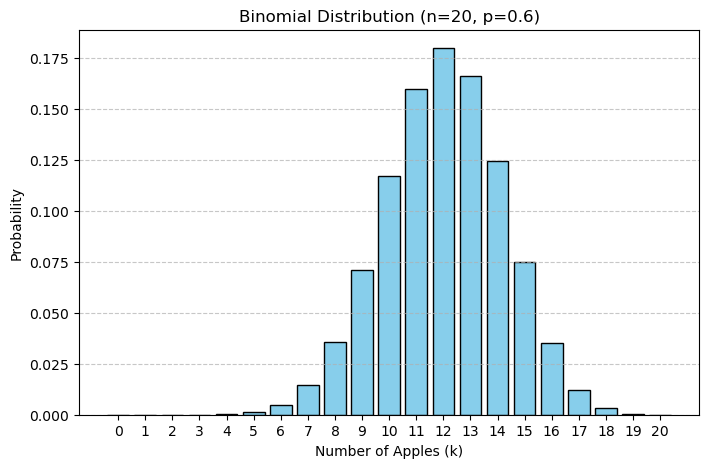

In [28]:
# Python code
import math
import matplotlib.pyplot as plt

def plot_binomial_distribution(n=20, p=0.6):
    # Generate x values from 0 to n
    x_values = range(n+1)
    
    # Compute the PMF for each x
    pmf_values = []
    for k in x_values:
        ways = math.comb(n, k)  # Combination C(n, k)
        pmf = ways * (p**k) * ((1 - p)**(n - k))
        pmf_values.append(pmf)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(x_values, pmf_values, color='skyblue', edgecolor='black')
    plt.xlabel('Number of Apples (k)')
    plt.ylabel('Probability')
    plt.title(f'Binomial Distribution (n={n}, p={p})')
    plt.xticks(x_values)  # Mark every integer from 0..n on x-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

if __name__ == '__main__':
    plot_binomial_distribution(n=20, p=0.6)

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

# The **Poisson probability mass function (PMF)** is given by:

\[
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
\]

Where:
- \( k \) is the number of goals (in this case, \(k = 5\)),
- \( \lambda = 2.3 \) is the average number of goals (mean),
- \( e \) is Euler's number (approximately \(2.71828\)).

---

## Steps:
1. Use the **math.exp()** function to compute \(e^{-\lambda}\).
2. Calculate the Poisson probability for exactly 5 goals.

---

In [35]:
# Python Code

import math

def poisson_probability(k, lambd):
    # Poisson PMF: P(X = k) = (lambda^k * e^(-lambda)) / k!
    probability = (lambd**k * math.exp(-lambd)) / math.factorial(k)
    return probability

# Given data
lambd = 2.3  # Average number of goals
k = 5        # Number of goals to calculate probability for

# Calculate probability
prob = poisson_probability(k, lambd)
print(f"The probability of scoring exactly {k} goals is: {prob:.4f}")

The probability of scoring exactly 5 goals is: 0.0538
